# Exercici 0:





Posem en una cel·la els codis dels mètodes de Jacobi, Gauss-Seidel i de $\omega$-relaxació

In [49]:
import numpy as np

def norma(u):
    return np.sqrt(sum(u**2))

def wrelax(A, b, x0, w, abstol=1.e-10, reltol=1.e-10, maxIter=1000):
    Emin = min (reltol*norma(x0),abstol)
    m, n = A.shape
    x = x0.copy()
    i = 0
    acabat = False
    while not acabat:
        i = i + 1
        x0 = x.copy()
        for j in range(n):
            x[j] = (1-w) * x[j] + (w/A[j,j]) * (b[j] - sum(A[j, :]*x[:]) + A[j,j]*x[j])
        Emin = min (reltol*norma(x),Emin)
        if((norma(x0 - x) < Emin) or i > maxIter):
            acabat = True

        if(i > maxIter):
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) < reltol):
                return x, -1
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) > reltol):
                return x, -2
            return x, -3
    return x, i

def Jacobi(A,b, x, abstol=1.e-10, reltol=1.e-10, maxIter = 1000):
  n = x.size
  xk = x.copy()
  atol = False
  rtol = False
  for k in range (maxIter):
    s = 0
    for i in range (n):
      s = sum(A[i,:]*x[:])
      s -= A[i,i]*x[i]
      xk[i] = 1/(A[i,i])*(b[i] - s)
    if atol == False and norma(xk - x) < abstol:
      atol = True
    if rtol == False and norma(xk-x)/norma(xk) < reltol:
      rtol = True
    if (atol and rtol):
      return xk, k
    x = xk.copy()
  if rtol:
    return xk, -1
  elif atol:
    return xk, -2
  return xk, -3

Creem la matriu A i els vectors b i $x_0$. Després apliquem els codis dels dos mètodes.

En el cas del mètode de Gauss-Seidel donem a $\omega$ el valor  $\omega = 1$ ja que aquest mètode es pot fer com a un cas particular del de $\omega$-relaxació ($\omega = 1$).

En darrer lloc, trobem el valor de $\omega$ òptim per resoldre el sistema de $\omega$-relaxació i donem el nombre d'iteracions.

In [50]:
A = np.zeros((8,8), dtype = np.float64) #Creem la matriu A del sistema.
for i in range (8):
    A[i,i] = 2
for i in range (7):
    A[i,i+1] = -1
    A[i+1,i] = -1

b = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)
x = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)

a, Jk = Jacobi(A,b,x)
a, GSk = wrelax(A,b,x,1) # Apliquem el mètode de relaxació amb omega=1

print (f"El mètode de Jacobi resol el sistema amb {Jk} iteracions.")
print (f"El mètode de Gauss-Seidel resol el sistema amb {GSk} iteracions.") 

wmin = 0.02
iteracions = 10000
for i in range (1999):
  w = (i + 1)/1000
  M = A.copy()
  B = b.copy()
  X = x.copy()
  a, k = wrelax(A,b,x,w)
  if (k < iteracions and k > 0):
    iteracions = k
    wmin = w
print (f"El w òptim és w = {wmin} i resol el sistema amb {iteracions} iteracions.")

El mètode de Jacobi resol el sistema amb 373 iteracions.
El mètode de Gauss-Seidel resol el sistema amb 194 iteracions.
El w òptim és w = 1.493 i resol el sistema amb 38 iteracions.


Veiem doncs que farem 373 iteracions amb el mètode de Jacobi i 194 si el fem amb el mètode de Gauss-Seidel. Mentre que amb el mètode de $\omega$-relaxació hem aconseguit resoldre el sistema amb només 38 iteracions, sent $\omega_{opt}= 1,493$ el valor de $\omega$ òptim.


# Exercici 1
Cal crear una funció que resolgui una EDO, donada una funció F.

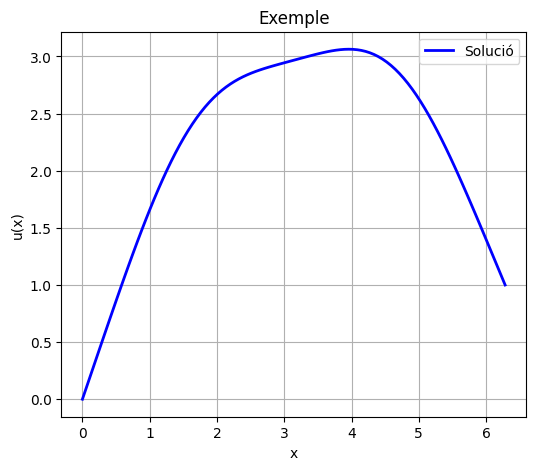

Aproximaxió de f(pi): 2.9674011002719896


In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
def solEstEq1D(a, b, ca, cb, N, F, maxIter=1.e5, tol=1.e-10):
    #On a i b són els extrems del interval, i ca i cb són els punts extrems
    #Definim el vector u i l'inicialitzem:
    u0 = (ca + cb) / 2
    u = np.full((N+1), u0, dtype=np.float64)
    u[0] = ca
    u[-1] = cb
    Fi = np.empty((N+1), dtype=np.float64)
    delta = (b - a)/N
    for i in range(N+1):
        Fi[i] = F(a + delta*i)

    for i in range(int(maxIter)):
        u[1:N] = (u[:N-1]+u[2:] + delta**2 * Fi[1:N])/2
    return(u, 0)




def dibuixaSol1D(u,a,b,titol='Exemple'):
    # Nombre de punts:
    Nplus1 = u.shape[0]

    # Malla equiespaiada:
    x = np.linspace(a,b,Nplus1)

    # Obrim la Figura i dibuixem:
    plt.figure(figsize=(6, 5))

    # Plot:
    plt.plot(x, u, label="Solució", color="b", linewidth=2)

    # Eixos i llegenda
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(titol)
    plt.grid(True)
    plt.legend()

    # Mostrem el dibuix:
    plt.show()

def funcio(x):
    return np.sin(x)**2

N = 100
a,b = 0, 2*np.pi
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(f"Aproximaxió de f(pi): {(u[50])}")


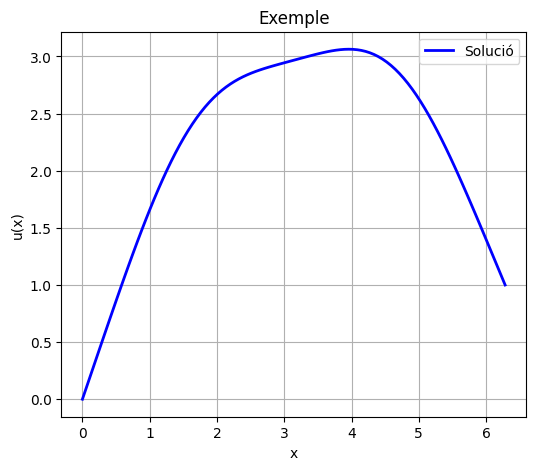

Aproximaxió de f(pi): 2.9674011002719896


In [52]:
def funcio2(x):
    return np.sin(x)**2

N = 100
a,b = 0, 2*np.pi
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio2, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(f"Aproximaxió de f(pi): {(u[50])}")


# Exercici 2:

Primer, posem el codi de la funció plotFME amb la qual representarem la temperatura de la FME.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plotFME(U,umin=None, umax=None):
    """
    Visualització interactiva de la temperatura de la FME

    Paràmetres:
    -----------
    U : array 3D
        Dades a visualitzar (shape: [N+1, M+1, P+1], suposem N > M)
    umin, umax : float
        Valors màxims per la colorbar (si és None, s'autoajusten)
    """
    # Dimensions u:
    Np1,Mp1,Pp1 = U.shape


    # Dimensions de la FME:
    x = np.linspace(0, 134, num=Np1)
    y = np.linspace(0, 64, num=Mp1)
    X, Y = np.meshgrid(x, y)

    # Recuperem el factor:
    P = Pp1-1
    scale = P/6;

    # Determinem els límits de les temperatures
    if umin is None:
        umin = np.nanmin(U)
    if umax is None:
        umax = np.nanmax(U)

    # Funció per actualitzar l'slider
    def update(index=0):
        plt.figure(figsize=(14, 6))

        v = U[:, :, int(index*scale)]

        # Mapa de colors:
        plot = plt.pcolor(X, Y, v.T, cmap='RdBu_r', vmin=umin, vmax=umax)

        # Corbes de nivell
        cset = plt.contour(X, Y, v.T, cmap='gray', levels=np.linspace(umin, umax, 10))
        plt.clabel(cset, inline=True)

        # Ajustem aspecte
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Alçada: {index} m')

        # Afegim colorbar
        plt.colorbar(plot, label='Valor')
        plt.show()

    # Creem slider interactiu
    interact(
        update,
        index=FloatSlider(
            min=0,
            max=6,
            step=1/scale,
            value=0,  # Valor inicial
            description='Alçada:',
            continuous_update=False  # Només s'actualitza al deixar anar l'slider
        )
    )

Ara, podem crear una funció que, donades les condicions inicials, simuli la temperatura de la FME. En el nostre cas, per diversió, hem afegit unes quantes funcions extres per enriquir la capacitat de simulació del programa. El codi és el següent:

In [ ]:
import numpy as np

def temperatura_FME(Ta, Tb, Tc, Td, Te, Tf, tol=1.e-8, maxIter = 100, h=0.5, T0=25.5, hotpoints = []):
    #INPUT:
    #En aquesta funció podem introduïr les tempeartures incials de les parets,
    #La tolerància del mètode, el nombre màxim d'iteracions, la mida de la
    # malla i la temperatura inicial del sistema.

    #OUTPUT:
    #Retorna el nombre d'iteracions juntament amb l'array u amb les temperatures finals de la FME.
    N, M, P = int(np.trunc(134/h)), int(np.trunc(64/h)), int(np.trunc(6/h))
    a, b = 0, N
    c, d = 0, M
    e, f = 0, P
    #print(f"Nodes: {N*M*P}")
    u = T0*np.ones((N+1,M+1,P+1))
    S = int(np.trunc(21/h))
    T = int(np.trunc(12/h))

    
    # Imposem les condicions de frontera i els punts d'intersecció
    u[:,0,:] = Tc  # Frontera TC
    u[S:N-S+1,M-T+1,:] = Tc  # Frontera Tc
    u[0,:,:] = Tb  # Frontera TB
    u[N-S+1,T:M-T+1,:] = Tb  # Frontera Tb
    u[:,-1,:] = Ta # Frontera TA
    u[S:N-S+1,T,:] = Ta # Frontera Ta
    u[-1,:,:] = Td # Frontera TD
    u[S,T:M-T+1,:] = Td # Frontera Td
    u[:,:,-1] = Te # Frontera Te
    u[:,:,0] = Tf # Frontera Tf

    u[S,T,1:-1] = (Tc + Td)/2
    u[S,M-T+1,1:-1] = (Td + Ta)/2
    u[N-S+1,T,1:-1] = (Tb + Tc)/2
    u[N-S+1,M-T+1,1:-1] = (Ta + Tb)/2

    u0 = u.copy()
    um = 1
    k = 0
    
    while  um > tol and k <= maxIter:
        u[1:S-1,1:-1,1:-1] = (u0[2:S,1:-1,1:-1] + u0[:S-2,1:-1,1:-1] + u0[1:S-1,2:,1:-1] + u0[1:S-1,:-2,1:-1] + u0[1:S-1,1:-1,:-2] + u0[1:S-1,1:-1,2:])/6 # Primer bloc (columna esquerra)
        u[N-S:-1,1:-1,1:-1] = (u0[N-S+1:,1:-1,1:-1] + u0[N-S-1:-2,1:-1,1:-1] + u0[N-S:-1,2:,1:-1] + u0[N-S:-1,:-2,1:-1] + u0[N-S:-1,1:-1,2:] + u0[N-S:-1,1:-1,:-2])/6 # Segon bloc (columna dreta)
        u[S-1:N-S,1:T-1,1:-1] = (u0[S-2:N-S-1,1:T-1,1:-1] + u0[S:N-S+1,1:T-1,1:-1] + u0[S-1:N-S,:T-2,1:-1] + u0[S-1:N-S,2:T,1:-1] + u0[S-1:N-S,1:T-1,:-2] + u0[S-1:N-S,1:T-1,2:])/6 # Tercer bloc (fila superior)
        u[S-1:N-S,M-T:-1,1:-1] = (u0[S-2:N-S-1,M-T:-1,1:-1] + u0[S:N-S+1,M-T:-1,1:-1] + u0[S-1:N-S,M-T-1:-2,1:-1] + u0[S-1:N-S,M-T+1:,1:-1] + u0[S-1:N-S,M-T:-1,:-2] + u0[S-1:N-S,M-T:-1,2:])/6 # Quart bloc (fila inferior)
        #Part (no necessaria) per ficar fonts de calor de radi r
        for point in hotpoints:
            u[point[0][0] - point[2] : point[0][0] + point[2], point[0][1] - point[2] : point[0][1] + point[2], point[0][2] - point[2] : point[0][2] + point[2]] = point[1]
        

        um = np.amax(abs(u0 - u))
        u0 = u.copy()
        k +=1
    u[S:N-S, T:M-T, :] = np.nan
    return u0, k


u_Ramon, k_Ramon = temperatura_FME(20.5, 20.5, 30.4, 25.3, 33, 18, h=0.5, T0 = 25.5, tol=1.e-10, maxIter = 1.e4)
u_Ruben, k_Ruben = temperatura_FME(20.6, 20.6, 31.0, 27.3, 33, 18, h=0.5, T0 = 25.5, tol=1.e-10, maxIter = 1.e4)
T_Ramon = np.sum(u_Ramon[:17,78:108,:6])/(17*30*6)
T_Ruben = np.sum(u_Ruben[:17,78:108,:6])/(17*30*6)
print("RAMON:")
print(f"Nombre d'iteracions: {k_Ramon}. Temperatura aula PC2: {T_Ramon}")
plotFME(u_Ramon)
print("RUBEN:")
print(f"Nombre d'iteracions: {k_Ruben}. Temperatura aula PC2: {T_Ruben}")
plotFME(u_Ruben)


#Part comentada: Petit test que simula la precència de fonts de calor (o fred) en la FME

# Forma de ficar un hotpoint:  hotpoint = [np.array([node_x, node_y, node_z]), Temperatura, Radi]
# I pots ficar tants com vulguis! Només cal assegurar que els fiques tots en el parametre hotpoints. És bastant divertit


#calent = [np.array([20, 20, 6]), 30, 2]
#fred = [np.array([220, 10, 3]), 10, 2]
# u_Test, k_Test = temperatura_FME(20.5, 20.5, 30.4, 25.3, 33, 18, h=0.5, T0 = 25.5, tol=1.e-12, maxIter = 1.e4, hotpoints=[calent, fred])
# plotFME(u_Test)


RAMON:
Nombre d'iteracions: 1433. Temperatura aula PC2: 20.612333995997496


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Alçada:', max=6.0, step=0.5…

RUBEN:
Nombre d'iteracions: 1431. Temperatura aula PC2: 20.631465514896338


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Alçada:', max=6.0, step=0.5…

Finalment, concluim dient que la temperatura mitjana de l'aula PC2 de la FME és de 20.612333995997496ºC per a les temperatures assignades al Ramon i de 20.631465514896338ºC per a les temperatures assignades al Rubén.